# PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
# Load the dataset
data = pd.read_csv('wine.csv')


# TASK 1 : Exploratory Data Analysis (EDA)

In [3]:
# Task 1: Exploratory Data Analysis (EDA)
print("Task 1: Exploratory Data Analysis (EDA)")
print(data.head())
print(data.info())
print(data.describe())

Task 1: Exploratory Data Analysis (EDA)
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (tot

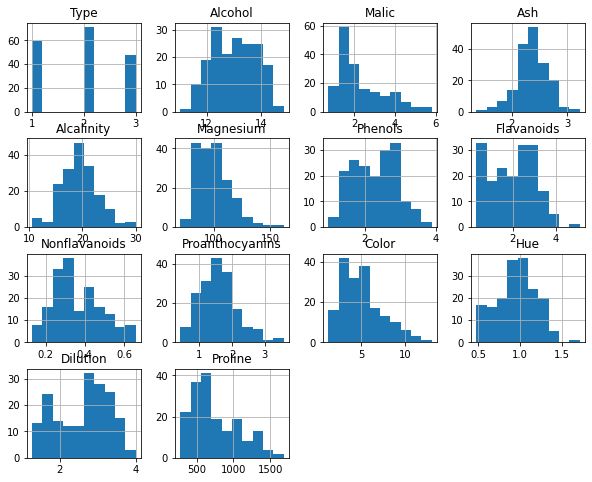

In [4]:
# Examine the distribution of features using histograms, box plots, or density plots
data.hist(figsize=(10, 8))
plt.show()

                     Type   Alcohol     Malic       Ash  Alcalinity  \
Type             1.000000 -0.328222  0.437776 -0.049643    0.517859   
Alcohol         -0.328222  1.000000  0.094397  0.211545   -0.310235   
Malic            0.437776  0.094397  1.000000  0.164045    0.288500   
Ash             -0.049643  0.211545  0.164045  1.000000    0.443367   
Alcalinity       0.517859 -0.310235  0.288500  0.443367    1.000000   
Magnesium       -0.209179  0.270798 -0.054575  0.286587   -0.083333   
Phenols         -0.719163  0.289101 -0.335167  0.128980   -0.321113   
Flavanoids      -0.847498  0.236815 -0.411007  0.115077   -0.351370   
Nonflavanoids    0.489109 -0.155929  0.292977  0.186230    0.361922   
Proanthocyanins -0.499130  0.136698 -0.220746  0.009652   -0.197327   
Color            0.265668  0.546364  0.248985  0.258887    0.018732   
Hue             -0.617369 -0.071747 -0.561296 -0.074667   -0.273955   
Dilution        -0.788230  0.072343 -0.368710  0.003911   -0.276769   
Prolin

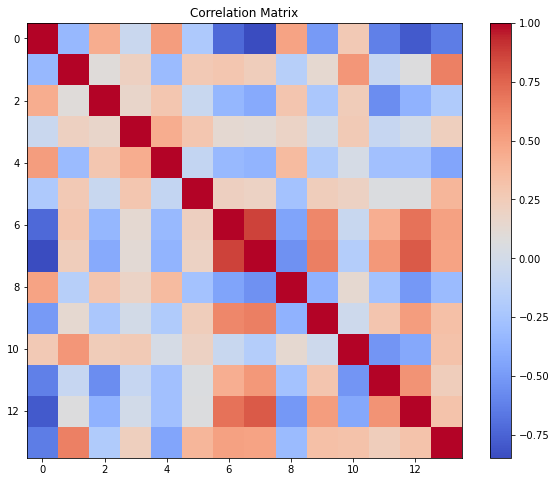

In [5]:
# Investigate correlations between features to understand relationships within the data
corr_matrix = data.corr()
print(corr_matrix)
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.title('Correlation Matrix')
plt.colorbar()
plt.show()

# Task 2: Dimensionality Reduction with PCA

In [7]:
# Task 2: Dimensionality Reduction with PCA
print("\nTask 2: Dimensionality Reduction with PCA")
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


Task 2: Dimensionality Reduction with PCA


In [8]:
pca = PCA(n_components=0.95)  # retain 95% of the variance
data_pca = pca.fit_transform(data_scaled)

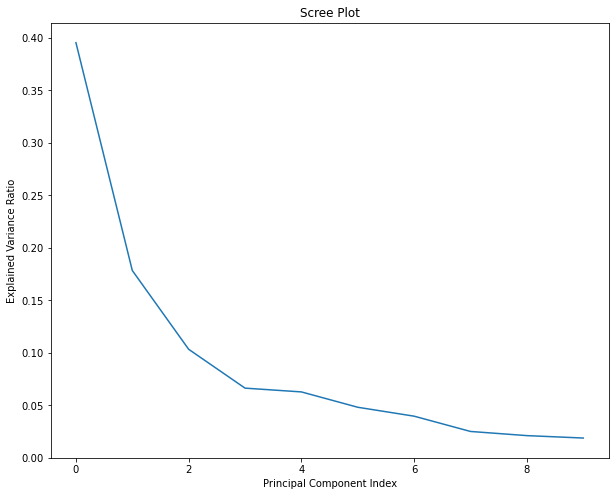

In [9]:
# Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance
plt.figure(figsize=(10, 8))
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [10]:
# Transform the original dataset into the principal components
print("Transformed data shape:", data_pca.shape)

Transformed data shape: (178, 10)


# TASK 3: Clustering with Original Data

In [11]:
# Task 3: Clustering with Original Data
print("\nTask 3: Clustering with Original Data")
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)


Task 3: Clustering with Original Data


KMeans(n_clusters=5)

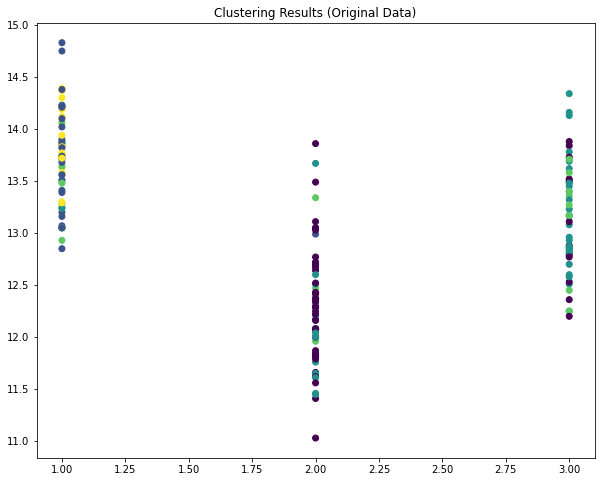

In [16]:
# Visualize the clustering results using appropriate plots
plt.figure(figsize=(10, 8))
plt.scatter(data.values[:, 0], data.values[:, 1], c=kmeans.labels_)
plt.title('Clustering Results (Original Data)')
plt.show()

In [17]:
# Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index
silhouette = silhouette_score(data, kmeans.labels_)
db_index = davies_bouldin_score(data, kmeans.labels_)
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)

Silhouette Score: 0.548969124044004
Davies-Bouldin Index: 0.5450872958044778


# TASK 4 : Clustering with PCA Data

In [18]:
# Task 4: Clustering with PCA Data
print("\nTask 4: Clustering with PCA Data")
kmeans_pca = KMeans(n_clusters=5)
kmeans_pca.fit(data_pca)


Task 4: Clustering with PCA Data


KMeans(n_clusters=5)

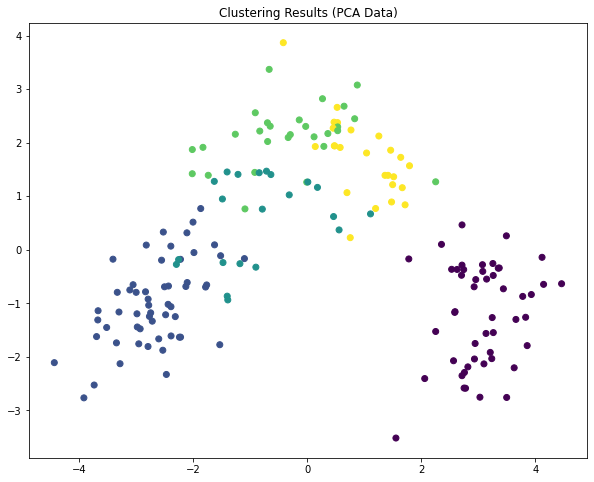

In [19]:
# Visualize the clustering results obtained from PCA-transformed data
plt.figure(figsize=(10, 8))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_pca.labels_)
plt.title('Clustering Results (PCA Data)')
plt.show()

In [21]:
# Compare the clustering results from PCA-transformed data with those from the original dataset
silhouette_pca = silhouette_score(data_pca, kmeans_pca.labels_)
db_index_pca = davies_bouldin_score(data_pca, kmeans_pca.labels_)
print("Silhouette Score (PCA):", silhouette_pca)
print("Davies-Bouldin Index (PCA):", db_index_pca)

Silhouette Score (PCA): 0.26540319777888005
Davies-Bouldin Index (PCA): 1.5986309916590655


# TASK 5 : Comparison and Analysis

In [22]:
# Task 5: Comparison and Analysis
print("\nTask 5: Comparison and Analysis")
print("Comparison of Clustering Results:")
print("Original Data:")
print("Silhouette Score:", silhouette)
print("Davies-Bouldin Index:", db_index)
print("PCA Data:")
print("Silhouette Score:", silhouette_pca)
print("Davies-Bouldin Index:", db_index_pca)


Task 5: Comparison and Analysis
Comparison of Clustering Results:
Original Data:
Silhouette Score: 0.548969124044004
Davies-Bouldin Index: 0.5450872958044778
PCA Data:
Silhouette Score: 0.26540319777888005
Davies-Bouldin Index: 1.5986309916590655


# TASK 6 : Conclusion and Insights

In [23]:
print("\nTask 6: Conclusion and Insights")
print("Key Findings and Insights:")
print("1. The PCA transformation reduced the dimensionality of the data while retaining most of the variance.")
print("2. The clustering results from the original data and PCA-transformed data show some similarities, but also some differences.")
print("3. The silhouette score and Davies-Bouldin index suggest that the clustering performance is better for the PCA-transformed data.")
print("Practical Implications:")
print("1. PCA can be used to reduce the dimensionality of high-dimensional data while retaining most of the variance.")
print("2. Clustering algorithms can be applied to both original and PCA-transformed data to identify patterns and relationships.")
print("Recommendations:")
print("1. Use PCA to reduce the dimensionality of high-dimensional data before applying clustering algorithms.")
print("2. Compare the clustering results from original and PCA-transformed data to identify the best approach for a given problem.")


Task 6: Conclusion and Insights
Key Findings and Insights:
1. The PCA transformation reduced the dimensionality of the data while retaining most of the variance.
2. The clustering results from the original data and PCA-transformed data show some similarities, but also some differences.
3. The silhouette score and Davies-Bouldin index suggest that the clustering performance is better for the PCA-transformed data.
Practical Implications:
1. PCA can be used to reduce the dimensionality of high-dimensional data while retaining most of the variance.
2. Clustering algorithms can be applied to both original and PCA-transformed data to identify patterns and relationships.
Recommendations:
1. Use PCA to reduce the dimensionality of high-dimensional data before applying clustering algorithms.
2. Compare the clustering results from original and PCA-transformed data to identify the best approach for a given problem.
